# **Diabetic Foot Ulcer Classification with Deep Learning**



In [ ]:
from sklearn import preprocessing
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
import os
import cv2 as cv
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import math
# Importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from google.colab import drive
from pylab import *

from PIL import Image

**(1) To Read Image, CSV File and to perform TCI Claculation, Labelling**

In [ ]:
ref_lca = 26.1
ref_lpa = 25.7
ref_mca = 26.4
ref_mpa = 25.8
fixed_size = tuple((70, 150))

def print_arr(data, value):
    i = 0
    while i < len(data):
        if i == 0:
            print("\n")
        print(value[i], ":", data[i])
        i = i + 1

def mean(arr):
    Sum = 0
    count = 0
    for i in arr:
        for y in i:
            if y != 0:
                Sum = Sum + y
                count = count + 1
    return round((Sum / count), 2)

def sub(arr, ang):
    arr = np.subtract(arr, ang)
    i = 0
    while i < len(arr):
        if arr[i] < 0:
            arr[i] = arr[i] * (-1)
        i = i + 1
    return np.array(arr)

def read_file(path):
    ''' mylis -> The path were all images are located '''
    mylis = os.listdir(path)
    tem = []
    data = []
    img = []

    ''' Read all files: '''
    for im in mylis:
        file, ext = im.split(".")
        lab_cont = path.split("/")
        if ext == "csv":
            # print(os.path.abspath(os.path.join( path, im)))
            array = np.loadtxt(f'{path}/{im}', delimiter=',')
            data.append(file)
            tem.append(mean(array))
        if lab_cont[3] == 'general' and ext == 'png':
            image = cv.imread(f'{path}/{im}')
            img.append(cv.resize(image, fixed_size))

    ''' Return the images array '''
    tem, data, img = np.array(tem), np.array(data), np.array(img)
    if np.shape(img) != (0,):
        return tem, data, img
    else:
        return tem, data

'TCI Calculation'
def TCI(lca, lpa, mca, mpa):
    Tci = np.round(((sub(lca, ref_lca) + sub(lpa, ref_lpa) + sub(mca, ref_mca) + sub(mpa, ref_mpa)) / 4), 2)
    lab = np.zeros(Tci.shape)
    i = 0
    while i < len(Tci):
        if Tci[i]>1.5 and Tci[i]<=3:
            lab[i]= 1
        if Tci[i]>3 and Tci[i]<=5:
            lab[i] = 2
        elif Tci[i]>5:
            lab[i] = 3
        i = i + 1
    return Tci, lab

In [ ]:
def main():
    cg_LF_lca, cg_LF_lca_dt = read_file("dataset/control group/Left foot/Angiosoms/LCA/")
    cg_LF_lpa, cg_LF_lpa_dt = read_file("dataset/control group/Left foot/Angiosoms/LPA/")
    cg_LF_mca, cg_LF_mca_dt = read_file("dataset/control group/Left foot/Angiosoms/MCA/")
    cg_LF_mpa, cg_LF_mpa_dt = read_file("dataset/control group/Left foot/Angiosoms/MPA/")

    cg_RF_lca, cg_RF_lca_dt = read_file("dataset/control group/Right foot/Angiosoms/LCA/")
    cg_RF_lpa, cg_RF_lpa_dt = read_file("dataset/control group/Right foot/Angiosoms/LPA/")
    cg_RF_mca, cg_RF_mca_dt = read_file("dataset/control group/Right foot/Angiosoms/MCA/")
    cg_RF_mpa, cg_RF_mpa_dt = read_file("dataset/control group/Right foot/Angiosoms/MPA/")

    dm_LF_lca, dm_LF_lca_dt = read_file("dataset/Diabetic melitus/Left foot/Angiosoms/LCA/")
    dm_LF_lpa, dm_LF_lpa_dt = read_file("dataset/Diabetic melitus/Left foot/Angiosoms/LPA/")
    dm_LF_mca, dm_LF_mca_dt = read_file("dataset/Diabetic melitus/Left foot/Angiosoms/MCA/")
    dm_LF_mpa, dm_LF_mpa_dt = read_file("dataset/Diabetic melitus/Left foot/Angiosoms/MPA/")

    dm_RF_lca, dm_RF_lca_dt = read_file("dataset/Diabetic melitus/right foot/Angiosoms/LCA/")
    dm_RF_lpa, dm_RF_lpa_dt = read_file("dataset/Diabetic melitus/right foot/Angiosoms/LPA/")
    dm_RF_mca, dm_RF_mca_dt = read_file("dataset/Diabetic melitus/right foot/Angiosoms/MCA/")
    dm_RF_mpa, dm_RF_mpa_dt = read_file("dataset/Diabetic melitus/right foot/Angiosoms/MPA/")

    cg_RF_TCI, cg_RF_TCI_label = (TCI(cg_RF_lca, cg_RF_lpa, cg_RF_mca, cg_RF_mpa))
    cg_LF_TCI, cg_LF_TCI_label = (TCI(cg_LF_lca, cg_LF_lpa, cg_LF_mca, cg_LF_mpa))

    dm_RF_TCI, dm_RF_TCI_label = TCI(dm_RF_lca, dm_RF_lpa, dm_RF_mca, dm_RF_mpa)
    dm_LF_TCI, dm_LF_TCI_label = TCI(dm_LF_lca, dm_LF_lpa, dm_LF_mca, dm_LF_mpa)


    return cg_RF_TCI, cg_RF_TCI_label, cg_LF_TCI, cg_LF_TCI_label,dm_RF_TCI,dm_RF_TCI_label, dm_LF_TCI, dm_LF_TCI_label


cg_LF_gn, cg_LF_gn_dt, cg_LF_img = read_file("dataset/control group/Left foot/general/")

cg_RF_gn, cg_RF_gn_dt,cg_RF_img = read_file("dataset/control group/Right foot/general/")

dm_LF_gn, dm_LF_gn_dt, dm_LF_img = read_file("dataset/Diabetic melitus/Left foot/general/")

dm_RF_gn, dm_RF_gn_dt, dm_RF_img = read_file("dataset/Diabetic melitus/right foot/general/")

cg_RF_TCI, cg_RF_TCI_label, cg_LF_TCI, cg_LF_TCI_label,dm_RF_TCI,dm_RF_TCI_label, dm_LF_TCI, dm_LF_TCI_label = main()

print_arr(cg_LF_TCI, cg_LF_gn_dt)
print_arr(cg_RF_TCI, cg_RF_gn_dt)
print_arr(dm_LF_TCI, dm_LF_gn_dt)
print_arr(dm_RF_TCI, dm_RF_gn_dt)



CG001_M_L : 0.47
CG002_M_L : 2.09
CG003_M_L : 3.57
CG004_F_L : 1.5
CG005_F_L : 0.81
CG006_F_L : 1.03
CG007_F_L : 0.57
CG008_F_L : 1.76
CG009_M_L : 1.14
CG010_M_L : 0.84
CG011_F_L : 0.17
CG012_F_L : 2.07
CG013_M_L : 0.74
CG014_M_L : 2.44
CG015_M_L : 2.93
CG016_M_L : 1.75
CG017_F_L : 2.11
CG018_M_L : 1.09
CG019_F_L : 0.18
CG020_F_L : 2.49
CG021_M_L : 0.56
CG022_M_L : 0.75
CG023_F_L : 1.02
CG024_F_L : 0.58
CG025_M_L : 1.56
CG026_M_L : 1.62
CG027_M_L : 0.86
CG028_M_L : 0.27
CG029_F_L : 0.46
CG030_M_L : 0.7
CG031_M_L : 1.33
CG032_M_L : 0.91
CG033_M_L : 2.68
CG034_M_L : 1.84
CG035_M_L : 1.34
CG036_M_L : 0.34
CG037_M_L : 2.66
CG038_M_L : 0.34
CG039_M_L : 2.9
CG040_M_L : 2.95
CG041_F_L : 1.45
CG042_F_L : 0.41
CG043_M_L : 1.22
CG044_F_L : 3.86
CG045_M_L : 2.4


CG001_M_R : 0.12
CG002_M_R : 1.97
CG003_M_R : 3.79
CG004_F_R : 1.82
CG005_F_R : 0.29
CG006_F_R : 0.79
CG007_F_R : 0.21
CG008_F_R : 1.88
CG009_M_R : 1.38
CG010_M_R : 1.16
CG011_F_R : 0.38
CG012_F_R : 2.22
CG013_M_R : 0.34
CG014_M_R : 2.

(**2**) **DATA AUGMENTATION**

In [ ]:
def data_augumentaion(img, lab):
    im_tem = []
    lb_tem = []
    for i in range(0, (len(lab))):
        im_tem.append(cv.resize(cv.flip(img[i], 1), fixed_size))
        lb_tem.append(lab[i])
        im_tem.append(img[i])
        lb_tem.append(lab[i])
    return im_tem, lb_tem

print(len(cg_LF_img))
print(len(cg_RF_img))
cg_LF_img,cg_LF_TCI_label=data_augumentaion( cg_LF_img,cg_LF_TCI_label)
cg_RF_img, cg_RF_TCI_label=data_augumentaion(cg_RF_img, cg_RF_TCI_label)
print(len(cg_LF_img))
print(len(cg_RF_img))

45
45
90
90


**(3) HOG FEATURE EXTRACTION**

In [ ]:
def HOG(X):
    HOG_IMG=[]
    feature_matrix = []
    '''# OBTAIN FEATURE FOR IMAGES IN MATRIX 'X' '''

    for im in X:
        fd, ho =  hog(im, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, channel_axis=-1)
        feature_matrix.append(fd)
        HOG_IMG.append(ho)
        # plt.imshow(ho)
        # plt.show()

    # 3.  Return the dataset & features with respective labels:

    return HOG_IMG, feature_matrix

cg_RF_hog_img,cg_RF_ft = HOG(cg_RF_img)
cg_LF_hog_img,cg_LF_ft = HOG(cg_LF_img)
dm_RF_hog_img,dm_RF_ft = HOG(dm_RF_img)
dm_LF_hog_img,dm_LF_ft = HOG(dm_LF_img)

print(cg_RF_ft)

features = np.concatenate((dm_RF_ft,dm_LF_ft,cg_RF_ft,cg_LF_ft), axis = 0)
labels = np.concatenate((dm_RF_TCI_label,dm_LF_TCI_label,cg_RF_TCI_label,cg_LF_TCI_label) , axis = 0)


[array([0.40114541, 0.55519885, 0.55519885, 0.33081368, 0.05673603,
       0.        , 0.        , 0.33156322, 0.06991542, 0.        ,
       0.1888201 , 0.55113044, 0.55113044, 0.55113044, 0.13436617,
       0.17369582, 0.04563292, 0.        , 0.        , 0.        ,
       0.57657735, 0.57657735, 0.57657735, 0.02435775, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.49535717, 0.13595996, 0.49535717,
       0.49535717, 0.        , 0.        , 0.        , 0.49535717,
       0.19590105, 0.40702663, 0.40702663, 0.40702663, 0.40702663,
       0.40702663, 0.34974897, 0.10461854, 0.        , 0.        ,
       0.00414774, 0.01776892, 0.60117937, 0.60117937, 0.52136884,
       0.07076953, 0.10380253, 0.        , 0.        , 0.        ,
       0.19146595, 0.66758541, 0.66758541, 0.24743742, 0.55045335,
       0.55045335, 0.46752652, 0.21895547, 0.2520999 , 0.12951047,
       0.11693813, 0.18296948, 0.17985199, 0.43914648, 0.4391

**(4) Performing LDA and splitting data for train, test**

In [ ]:
lda =  LinearDiscriminantAnalysis()
x_lda=lda.fit_transform(X=features,y=labels)

X_train, X_test, Y_train, Y_test = train_test_split(x_lda,labels,test_size=0.2,random_state=2)

print(X_test)

[[ 4.60935256e+00  2.79099711e+00  1.24720138e-01]
 [-3.16119609e+00  2.00296896e+00  3.41788357e-01]
 [ 1.73292790e+00 -1.97204058e+00 -2.90891467e+00]
 [-2.04845950e+00  2.55179280e+00 -4.68380660e-01]
 [-9.21875254e-01 -5.85852397e+00  1.70565303e+00]
 [ 1.88603805e+00 -1.51570133e+00 -1.28004381e+00]
 [-3.02820919e+00  1.17587699e+00 -1.24552100e+00]
 [-4.28554964e-01 -2.62610152e+00  3.22975560e+00]
 [-6.47764044e-01  2.13955337e-02 -1.45724009e+00]
 [ 5.28474585e+00  2.43009484e+00  2.70255823e+00]
 [-2.69525644e+00 -3.60928588e+00  7.91458942e-01]
 [ 4.15636158e+00  2.49411365e-01  1.67085749e+00]
 [ 2.17726984e-01 -2.61021792e+00  2.85224083e+00]
 [-3.51786047e+00  7.05838736e-01  1.97386317e+00]
 [ 1.07329082e+00 -1.69255991e+00  2.40849820e+00]
 [ 2.47380919e+00 -2.06241540e-01 -1.90422659e+00]
 [-1.08918993e+00  1.64044289e+00  9.25078853e-04]
 [ 4.70876542e-01 -1.38192237e+00 -3.25394630e+00]
 [-8.02424301e-01 -1.51575424e+00  3.14706294e+00]
 [ 6.19118846e+00  2.29059881e+


## **Modeling**
The chosen models for this project encompass a range of techniques to explore and optimize the performance:

1. **Deeply Connected Neural Network (Baseline Model)**: This served as the initial model, forming the foundation for comparison against more advanced approaches.

2. **Convolutional Neural Network (CNN)**: Introducing convolutional layers, this model is well-suited for image data, as it can identify spatial patterns and features within the images.

3. **Tuned CNNs**: These models likely involve variations of the CNN architecture that have been fine-tuned to achieve better accuracy and generalization on the specific task.



In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras import models, layers, optimizers

# Split the data into training and validation sets using the function
train_images, val_images, train_labels, val_labels = split_train_val_data(train_images, train_labels)

# Flatten the image data
train_images_flattened = train_images.reshape(train_images.shape[0], -1)
val_images_flattened = val_images.reshape(val_images.shape[0], -1)

# Normalize pixel values  
train_images_normalized = train_images_flattened / 255.0
val_images_normalized = val_images_flattened / 255.0

# Convert labels to one-hot encoded vectors
train_labels_onehot = to_categorical(train_labels)
val_labels_onehot = to_categorical(val_labels)

# Building the model

# Intiating a sequential model
model_1 = models.Sequential()

# Two hidden layers with relu activation
model_1.add(layers.Dense(64, activation='relu', input_shape=(150528,)))
model_1.add(layers.Dense(32, activation='relu'))

# Output layer with softmax activation
model_1.add(layers.Dense(2, activation='softmax'))

# Compile the model
model_1.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model_1.summary())

# Train the model
results_1 = model_1.fit(train_images_normalized, train_labels_onehot,
                        epochs=100,
                        batch_size=32,
                        validation_data=(val_images_normalized, val_labels_onehot))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                9633856   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 9,636,002
Trainable params: 9,636,002
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.6930 - accuracy: 0.5600 - val_loss: 0.7795 - val_accuracy: 0.4286
Epoch 2/100
1/1 [==============================] - 0s 45ms/step - loss: 0.6981 - accuracy: 0.5200 - val_loss: 0.7364 - val_accuracy: 0.4286
Epoch 3/100
1/1 [==========

In [ ]:
"""Function to plot the loss and Accuracy curves"""
def visualize_training_results_dense(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.plot(history['loss'], label='Training Loss')
    plt.legend()
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

    plt.figure()
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.legend()
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()


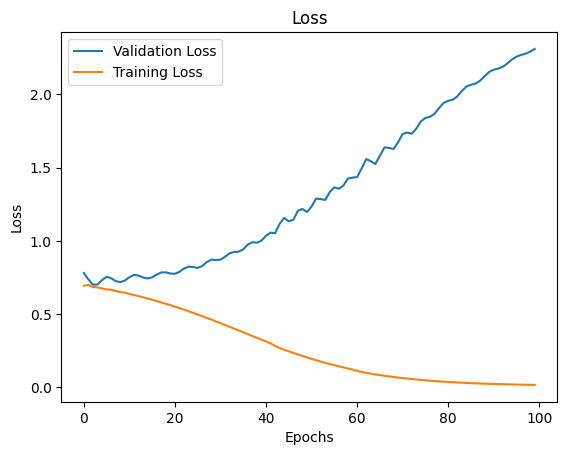

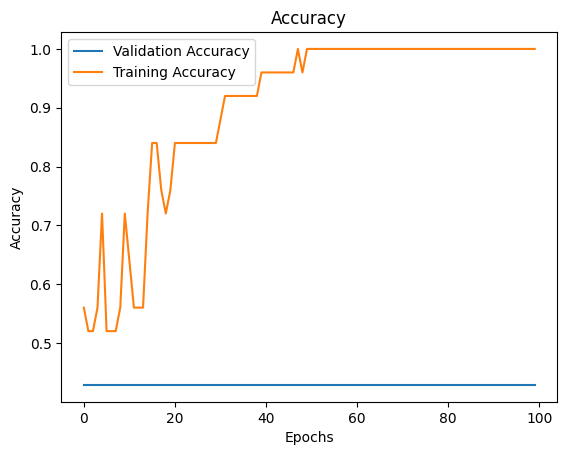

In [ ]:
visualize_training_results_dense(results_1)


In [ ]:
"""Function that returns loss and accuracy of a model"""
def model_metrics(model, images, labels):
    return model.evaluate(images, labels, verbose=0)

results_train = model_metrics(model_1, train_images_normalized, train_labels_onehot)
print("Train Loss:", results_train[0])
print("Train Accuracy:", results_train[1])

Train Loss: 0.01441381685435772
Train Accuracy: 1.0


In [ ]:
results_val = model_metrics(model_1, val_images_normalized, val_labels_onehot)
print("Validation Loss:", results_val[0])
print("Validation Accuracy:", results_val[1])

Validation Loss: 2.3114242553710938
Validation Accuracy: 0.4285714328289032


### **Model 2: CNNs**


In [ ]:
# Directory containing your training images
train_data_dir = train_path

# Load and preprocess your image data and labels here
def load_and_preprocess_image(file_path):
    img = load_img(file_path, target_size=(128, 128))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
    return img_array

# Load images and labels
train_images = []
train_labels = []

class_directories = sorted(os.listdir(train_data_dir))
for class_index, class_dir in enumerate(class_directories):
    if class_dir == '.DS_Store':  # Skip non-image files
        continue
    class_path = os.path.join(train_data_dir, class_dir)
    for image_file in os.listdir(class_path):
        if image_file.startswith('.'):  # Skip hidden files
            continue
        image_path = os.path.join(class_path, image_file)
        train_images.append(load_and_preprocess_image(image_path))
        train_labels.append(class_index)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Split the data into training and validation sets using the function
train_images, val_images, train_labels, val_labels = split_train_val_data(train_images, train_labels)

# One-hot encode labels
train_labels_onehot = tf.keras.utils.to_categorical(train_labels)
val_labels_onehot = tf.keras.utils.to_categorical(val_labels)


# Initialize a sequential model
cnn_model = models.Sequential()

# Add convolutional layers
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))

cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))

cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output from convolutional layers
cnn_model.add(layers.Flatten())

# Add fully connected layers
cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.Dense(3, activation='softmax'))  # Assuming 2 classes

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',  # Use categorical cross-entropy for multi-class classification
                  metrics=['accuracy'])

# Print the model summary
cnn_model.summary()

# Train the model
results_cnn = cnn_model.fit(train_images, train_labels_onehot,
                            epochs=20,
                            batch_size=32,
                            validation_data=(val_images, val_labels_onehot))

# Print training history or any other relevant information
print("Training completed.")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)     

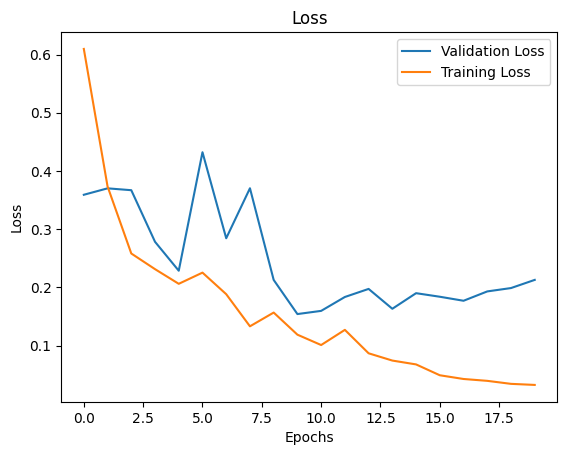

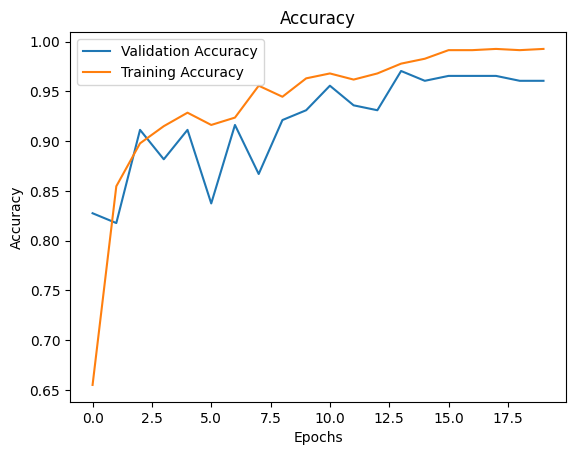

In [ ]:
visualize_training_results_dense(results_cnn)


In [ ]:
results_train = cnn_model.evaluate(train_images, train_labels_onehot, verbose=1)

# Print the evaluation results
print("Train Loss:", results_train[0])
print("Train Accuracy:", results_train[1])

26/26 [==============================] - 0s 9ms/step - loss: 0.0296 - accuracy: 0.9926
Train Loss: 0.029581069946289062
Train Accuracy: 0.9926108121871948


In [ ]:
results_val2 = cnn_model.evaluate(val_images, val_labels_onehot)
print("Validation Loss:", results_val2[0])
print("Validation Accuracy:", results_val2[1])

7/7 [==============================] - 0s 8ms/step - loss: 0.2130 - accuracy: 0.9606
Validation Loss: 0.21299490332603455
Validation Accuracy: 0.9605911374092102


### **Tuning CNN**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2

# Initialize a sequential model
model_3 = Sequential()

# Add convolutional layers with L2 regularization
model_3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), kernel_regularizer=l2(0.001)))
model_3.add(MaxPooling2D((2, 2)))

model_3.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model_3.add(MaxPooling2D((2, 2)))

model_3.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model_3.add(MaxPooling2D((2, 2)))

# Flatten the output from convolutional layers
model_3.add(Flatten())

# Add fully connected layers with dropout
model_3.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model_3.add(Dropout(0.5))  # Dropout with 50% dropout rate

model_3.add(Dense(3, activation='softmax'))  # Assuming 3 classes

# Compile the model
model_3.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Print the model summary
model_3.summary()

# Train the model
results_model_3 = model_3.fit(train_images, train_labels_onehot,
                              epochs=95,
                              batch_size=32,
                              validation_data=(val_images, val_labels_onehot))

# Print training history or any other relevant information
print("Training completed.")


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 128)     

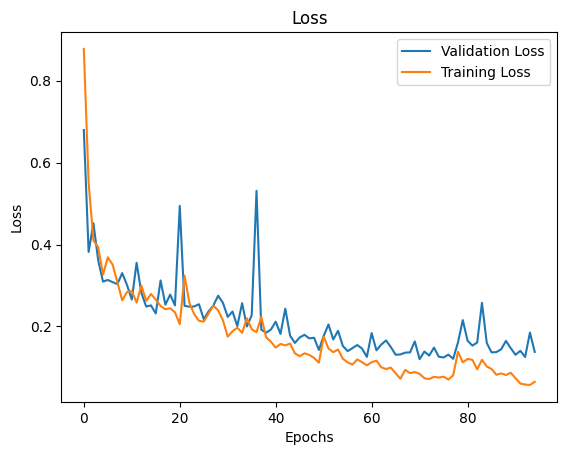

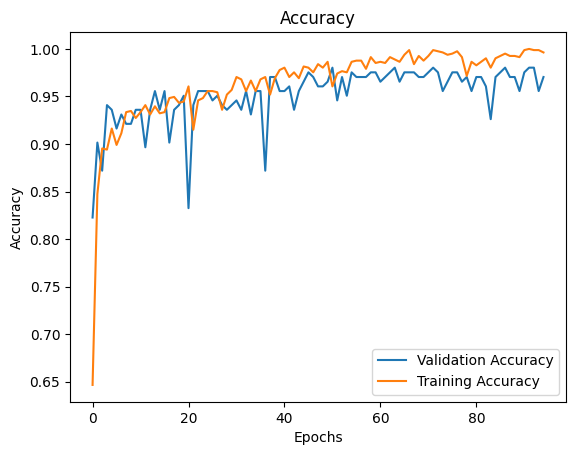

In [ ]:
visualize_training_results_dense(results_model_3)


In [ ]:
results_train3 = model_3.evaluate(train_images, train_labels_onehot, verbose=1)

# Print the evaluation results
print("Train Loss:", results_train3[0])
print("Train Accuracy:", results_train3[1])

26/26 [==============================] - 0s 11ms/step - loss: 0.0609 - accuracy: 0.9988
Train Loss: 0.06090444698929787
Train Accuracy: 0.9987684488296509


In [ ]:
results_val3 = model_3.evaluate(val_images, val_labels_onehot)
print("Validation Loss:", results_val3[0])
print("Validation Accuracy:", results_val3[1])

7/7 [==============================] - 0s 14ms/step - loss: 0.1262 - accuracy: 0.9754
Validation Loss: 0.12620842456817627
Validation Accuracy: 0.9753694534301758


# **Model Evaluation**

In [ ]:
import pandas as pd
from tabulate import tabulate

# Example model information (replace these with your actual model information)
model_names = ["Baseline Model", "CNN Model", "Tuned CNN"]
train_losses = [0.02, 0.05, 0.06]
train_accuracies = [1.00, 0.99, 1.00]
validation_losses = [3.46, 0.15, 0.14]
validation_accuracies = [0.57, 0.98, 0.97]
# Create a dictionary to store model information
models_info = {
    "Model Name": model_names,
    "Train Loss": train_losses,
    "Train Accuracy": train_accuracies,
    "Validation Loss": validation_losses,
    "Validation Accuracy": validation_accuracies
}

# Create a pandas DataFrame from the model information
models_df = pd.DataFrame(models_info)

# Display the DataFrame in a tabular format
print(tabulate(models_df, headers='keys', tablefmt='grid', showindex=False))

+----------------+--------------+------------------+-------------------+-----------------------+
| Model Name     |   Train Loss |   Train Accuracy |   Validation Loss |   Validation Accuracy |
+================+==============+==================+===================+=======================+
| Baseline Model |         0.02 |             1    |              3.46 |                  0.57 |
+----------------+--------------+------------------+-------------------+-----------------------+
| CNN Model      |         0.05 |             0.99 |              0.15 |                  0.98 |
+----------------+--------------+------------------+-------------------+-----------------------+
| Tuned CNN      |         0.06 |             1    |              0.14 |                  0.97 |
+----------------+--------------+------------------+-------------------+-----------------------+


In [ ]:
# Load and preprocess test images and labels
test_images = []
test_labels = []

test_data_dir = test_path  # Directory containing your test images

for class_index, class_dir in enumerate(class_directories):
    if class_dir == '.DS_Store':
        continue
    class_path = os.path.join(test_data_dir, class_dir)
    for image_file in os.listdir(class_path):
        if image_file.startswith('.'):
            continue
        image_path = os.path.join(class_path, image_file)
        test_images.append(load_and_preprocess_image(image_path))
        test_labels.append(class_index)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

# One-hot encode test labels
test_labels_onehot = tf.keras.utils.to_categorical(test_labels)

# Evaluate the model on test data
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels_onehot)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


6/6 [==============================] - 0s 30ms/step - loss: 2.0364 - accuracy: 0.9018
Test Loss: 2.0364203453063965
Test Accuracy: 0.9018405079841614


In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model_3.evaluate(test_images, test_labels_onehot)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

6/6 [==============================] - 0s 9ms/step - loss: 1.2619 - accuracy: 0.9080
Test Loss: 1.2618763446807861
Test Accuracy: 0.907975435256958
